# Ilustrando la diferencia entre serie de tiempo y proceso estocástico, estacionario y no estacionario

*Material del curso EC4301 Macroeconometría*

Universidad de Costa Rica

**Profesor:  Randall Romero Aguilar**

Actualizado: 2021-Jun-09

Ejemplo numérico para ilustrar las pruebas de Box-Pierce y Ljung-Box.

In [1]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rc
rc('text', usetex=True)

figpath = "../figures/"

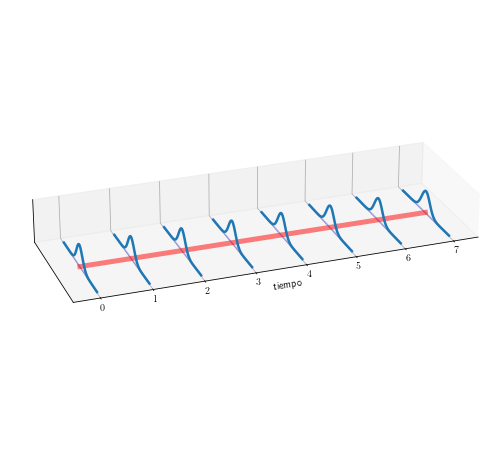

In [7]:
# Make data.
t = np.arange(0, 8)
y = np.arange(-9, 9, 0.125)
T, Y = np.meshgrid(t, y)

def pdf(x,mu,sigma):
    return np.exp(-(x-mu)**2/(2*sigma**2)) / (sigma*np.sqrt(2*np.pi))

def pdf_plot(x,mu,sigma, ax, fname):
    Z = pdf(x, mu, sigma)
    for ti in T[0]:
        ax.plot([ti, ti],[x.min(), x.max()], 0, 'blue', alpha=0.25)
    
    ax.plot(T[0], mu[0], 0,'red', alpha=0.5, linewidth=5)
    surf = ax.plot_wireframe(T, Y, Z, rstride=0, cstride=1, linewidth=2.5)
    ax.set(xlabel='\ntiempo',
           ylabel=' ',
           ylim=[-10,10],
           zlim=[0,0.5],
           yticks=[],
           zticks=[]
          )
    
    ax.set_box_aspect((18,6,2))
    ax.view_init(25, 250)
    plt.gcf().patch.set_facecolor("None")
    plt.savefig(figpath + fname,bbox_inches='tight')
    
common_figure_size = [8,8]

fig = plt.figure(figsize=common_figure_size)
ax1 = fig.gca(projection='3d')
pdf_plot(Y, 0*T, 1.5, ax1,'stationary.pdf')

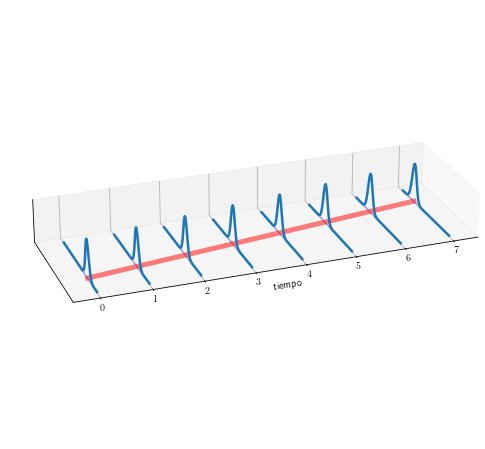

In [8]:
fig = plt.figure(figsize=common_figure_size)
ax2 = fig.gca(projection='3d')
pdf_plot(Y, 1.2*T-4, 0.85, ax2,'trending.pdf')

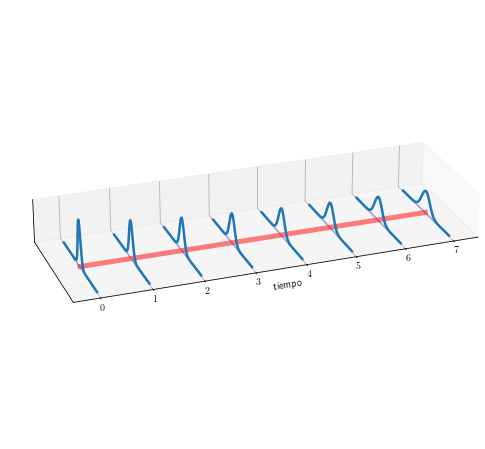

In [9]:
fig = plt.figure(figsize=common_figure_size)
ax3 = fig.gca(projection='3d')
pdf_plot(Y, 0*T, (T+2)**0.5/2, ax3,'widening.pdf')

### muestra

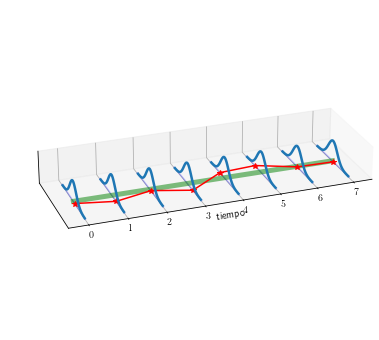

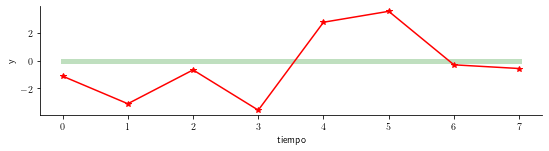

In [12]:
def pdf_plot_muestra(x,mu,sigma, fname):
    fig = plt.figure(figsize=[9,6])
    ax = fig.gca(projection='3d')

    Z = pdf(x, mu, sigma)
    for ti in T[0]:
        ax.plot([ti, ti],[x.min(), x.max()], 0, 'blue', alpha=0.25)
    
    ax.plot(T[0], mu[0], 0,'green', alpha=0.5, linewidth=5)
    
    sample = mu[0] + sigma[0]*np.random.randn(*mu[0].shape)
    ax.set_box_aspect((18,6,2))
    elev = 25.0
    azim = 250.0
    ax.view_init(elev, azim)

    ax.plot(T[0], sample, 'r-*')   
    surf = ax.plot_wireframe(T, Y, Z, rstride=0, cstride=1, linewidth=2.5)
    ax.set(xlabel='tiempo',
           ylabel=' ', 
           ylim=[-11,11],
           yticks=[ ],
           zlim=[0,0.25],
           zticks=[])

    fig.set_size_inches([9,6])
    
    fig2, ax2 = plt.subplots(figsize=[9,2])        
    ax2.plot(T[0], mu[0],'green', alpha=0.25, linewidth=5)
    ax2.plot(T[0], sample, 'r-*')
    ax2.set_xlabel('tiempo')
    ax2.set_ylabel('y')
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    
    fig.patch.set_facecolor("None")
    fig2.patch.set_facecolor("None")
    
    fig.savefig(figpath+fname+'-3D.pdf',bbox_inches='tight')
    fig2.savefig(figpath+fname+'-2D.pdf',bbox_inches='tight')
    return None


pdf_plot_muestra(Y, 0*T, 2.4*np.ones_like(T), 'serie-estacionaria')

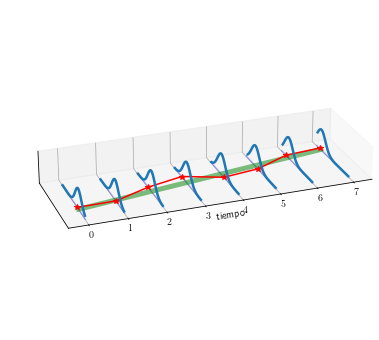

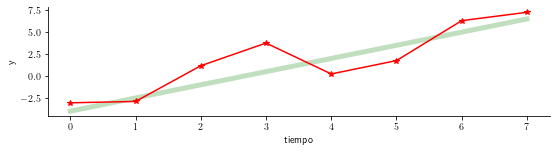

In [13]:
pdf_plot_muestra(Y, 1.5*T-4, 2.4*np.ones_like(T), 'serie-no-estacionaria')